Trying Sentiment Analysis on a different dataset

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk


In [65]:
df = pd.read_csv('C:/Users/hp/Desktop/Data/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [66]:
df = df.reset_index().rename(columns={'index' : 'id'})

In [67]:
df.head()

,id,Review,Rating
0,0,nice hotel expensive parking got good deal sta...,4
1,1,ok nothing special charge diamond member hilto...,2
2,2,nice rooms not 4* experience hotel monaco seat...,3
3,3,"unique, great stay, wonderful time hotel monac...",5
4,4,"great stay great stay, went seahawk game aweso...",5


In [68]:
print(df.shape)

(20491, 3)


In [69]:
df['Review'].values[200]

"stay plenty nice hotels seattle, not, terrible stay bellman lost luggage phones did n't work dirty sheets letter manager answered acknowledged, better staying,  "

In [70]:
df1 = df.head(200)

In [71]:
df2 = df.iloc[200:1000]

In [72]:
df3 = df.tail(200)

In [73]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(200, 3)
(800, 3)
(200, 3)


In [74]:
df2

,id,Review,Rating
200,200,"stay plenty nice hotels seattle, not, terrible...",1
201,201,"average facilities need overhaul feel dated, s...",3
202,202,"no miss hotel vanish no miss, hotel far jewel ...",2
203,203,excellent choice great choice stay close airpo...,5
204,204,posh hotel husband stayed hilton seattle septe...,4
...,...,...,...
995,995,average price hotel good location 1.5 blocks u...,3
996,996,good customer service recently wrote dissatisf...,4
997,997,ignore bad press just post review reading nega...,4
998,998,"business trip ok hotel fine evening business, ...",3


In [75]:
df2['Rating']

200    1
201    3
202    2
203    5
204    4
      ..
995    3
996    4
997    4
998    3
999    3
Name: Rating, Length: 800, dtype: int64

In [76]:
df2['Rating'].value_counts()

5    281
4    243
3    103
1     87
2     86
Name: Rating, dtype: int64

In [77]:
df2['Rating'].value_counts().sort_index()

1     87
2     86
3    103
4    243
5    281
Name: Rating, dtype: int64

<Axes: title={'center': 'Count of Reviews by star'}>

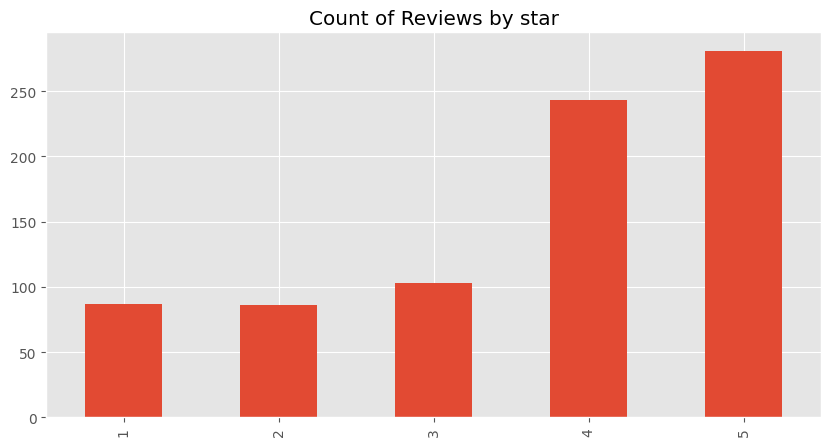

In [78]:
df2['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by star', figsize=(10,5))

In [79]:
rev200 = df2['Review'][200]

In [80]:
rev200

"stay plenty nice hotels seattle, not, terrible stay bellman lost luggage phones did n't work dirty sheets letter manager answered acknowledged, better staying,  "

In [81]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [82]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
nltk.word_tokenize(rev200)

['stay',
 'plenty',
 'nice',
 'hotels',
 'seattle',
 ',',
 'not',
 ',',
 'terrible',
 'stay',
 'bellman',
 'lost',
 'luggage',
 'phones',
 'did',
 "n't",
 'work',
 'dirty',
 'sheets',
 'letter',
 'manager',
 'answered',
 'acknowledged',
 ',',
 'better',
 'staying',
 ',']

In [84]:
tokens = nltk.word_tokenize(rev200)

In [93]:
nltk.download('average_percentage_tagger')
nltk.pos_tag(tokens)

[nltk_data] Error loading average_percentage_tagger: Package
[nltk_data]     'average_percentage_tagger' not found in index


[('stay', 'VB'),
 ('plenty', 'JJ'),
 ('nice', 'JJ'),
 ('hotels', 'NNS'),
 ('seattle', 'RB'),
 (',', ','),
 ('not', 'RB'),
 (',', ','),
 ('terrible', 'JJ'),
 ('stay', 'NN'),
 ('bellman', 'NN'),
 ('lost', 'VBD'),
 ('luggage', 'JJ'),
 ('phones', 'NNS'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('work', 'VB'),
 ('dirty', 'JJ'),
 ('sheets', 'NNS'),
 ('letter', 'NN'),
 ('manager', 'NN'),
 ('answered', 'VBD'),
 ('acknowledged', 'VBD'),
 (',', ','),
 ('better', 'RBR'),
 ('staying', 'NN'),
 (',', ',')]

In [94]:
tagged = nltk.pos_tag(tokens)

In [101]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [103]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [104]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  stay/VB
  plenty/JJ
  nice/JJ
  hotels/NNS
  seattle/RB
  ,/,
  not/RB
  ,/,
  terrible/JJ
  stay/NN
  bellman/NN
  lost/VBD
  luggage/JJ
  phones/NNS
  did/VBD
  n't/RB
  work/VB
  dirty/JJ
  sheets/NNS
  letter/NN
  manager/NN
  answered/VBD
  acknowledged/VBD
  ,/,
  better/RBR
  staying/NN
  ,/,)


In [88]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [89]:
sia = SentimentIntensityAnalyzer()

In [90]:
sia.polarity_scores('I lost my phone in the hotel room')

{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}

In [91]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [92]:
sia.polarity_scores('I hate sweet aroma')

{'neg': 0.481, 'neu': 0.13, 'pos': 0.39, 'compound': -0.1779}